In [1]:
%load_ext Cython

In [2]:
%%time
%%cython
import numpy as np
import matplotlib.pyplot as plt
import math
from timeit import default_timer as timer

cimport cython
cimport numpy as np
from numpy cimport ndarray

cpdef np.float64_t[:,:] cy_solver(int grid, int maxiter):
    cdef int phi_bottom = 1
    cdef const double[:] x = np.linspace(0, 1, grid)
    cdef const double[:] y = x
    cdef double dx = x[1] - x[0]
    cdef double dy = dx
    cdef double A = 2.0/(dx*dx) + 2.0/(dy*dy)
    cdef double B = 1.0/(dx*dx)
    cdef double C = 1.0/(dy*dy)
    cdef np.float64_t[:,:] phi = np.zeros((grid,grid))
    # impose boundary conditions on bottom edge
    phi[:1, :] = phi_bottom
    # relaxation method
    cdef int t,i,j
    for t in range(maxiter):
        newphi = np.zeros((grid,grid))
        for i in range(1,grid-1):
            for j in range(1,grid-1):
                newphi[i,j] = (B*(phi[i+1,j] + phi[i-1,j]) + C*(phi[i,j+1] + phi[i,j-1]))/A
        for i in range(1,grid-1):
            for j in range(1,grid-1):
                phi[i,j] = newphi[i,j]
    colorinterpolation = 100
    colourMap = plt.cm.jet
    plt.contourf(x, y, phi, colorinterpolation, cmap=colourMap)
    plt.colorbar()
    plt.title('Grid = {}, Number of iterations = {}'.format(grid, maxiter))
    plt.show()
    return phi

cpdef ndarray[:,:] cy_fill_array(int grids, int maxiters, phi_array, list grid_array, list maxiter_array):
    cdef int i,j
    for i in range(grids):
        for j in range(maxiters):
            start = timer()
            cy_phi = cy_solver(grid_array[i], maxiter_array[j])
            end = timer()
            print('Time taken to solve grid = {}, iterations = {}: {:.3f}s'.format(grid_array[i], maxiter_array[j], end-start))
            cy_phi = np.asarray(cy_phi)
            phi_array[i,j] = cy_phi[math.floor(grid_array[i]/4),:]
    return phi_array

cpdef void cy_plot(int grids, ndarray[:,:] phi_array, list grid_array, list maxiter_array):
    cdef int i
    plt.figure(figsize=(10,7))
    for i in range(grids):
        x_axis = np.linspace(0,1,grid_array[i])
        for j in range(len(maxiter_array)):
            plt.plot(x_axis,phi_array[i,j], label = 'Grid = {}, Iterations = {}'.format(grid_array[i],maxiter_array[j]))
    plt.legend()
    plt.show()

cpdef void cy_same_grid_different_iter_plot(int grids, ndarray[:,:] phi_array, list grid_array, list maxiter_array):
    cdef int i
    for i in range(grids):
        plt.figure(figsize=(10,7))
        x_axis = np.linspace(0,1,grid_array[i])
        for j in range(len(maxiter_array)):
            plt.plot(x_axis,phi_array[i,j], label = 'Grid = {}, Iterations = {}'.format(grid_array[i],maxiter_array[j]))
        plt.legend()
        plt.show()

CPU times: user 385 ms, sys: 114 ms, total: 499 ms
Wall time: 925 ms


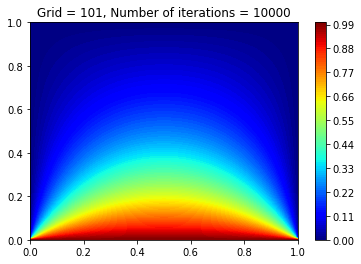

Time taken to solve grid = 101, iterations = 10000: 21.209s


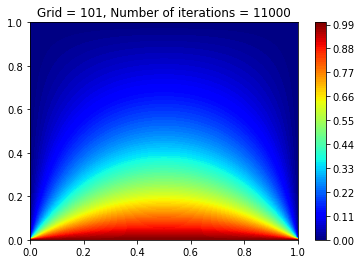

Time taken to solve grid = 101, iterations = 11000: 23.759s


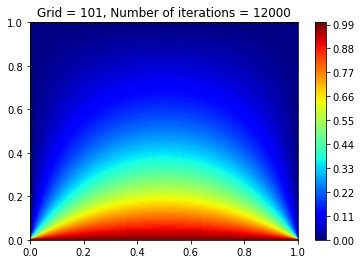

Time taken to solve grid = 101, iterations = 12000: 23.520s


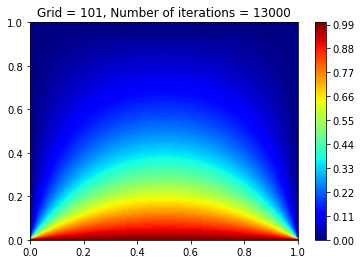

Time taken to solve grid = 101, iterations = 13000: 25.125s


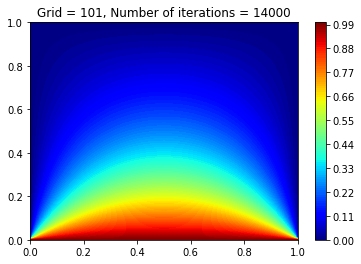

Time taken to solve grid = 101, iterations = 14000: 27.388s


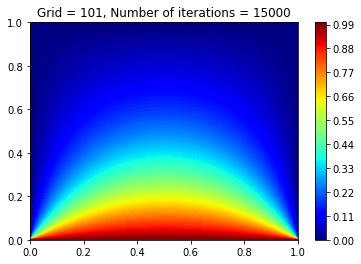

Time taken to solve grid = 101, iterations = 15000: 29.229s


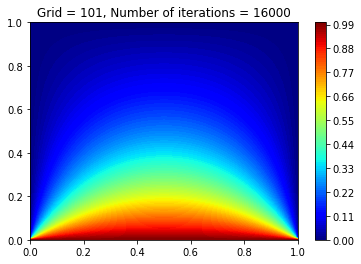

Time taken to solve grid = 101, iterations = 16000: 30.786s


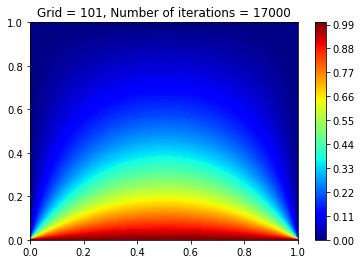

Time taken to solve grid = 101, iterations = 17000: 33.967s


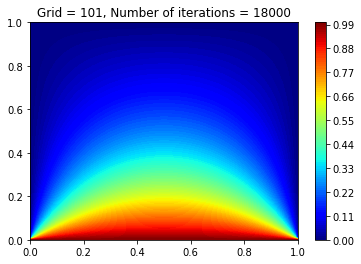

Time taken to solve grid = 101, iterations = 18000: 34.805s


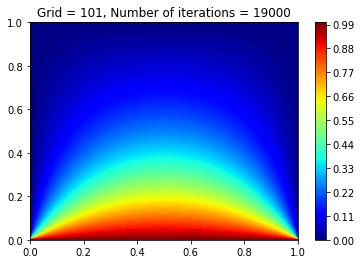

Time taken to solve grid = 101, iterations = 19000: 36.954s


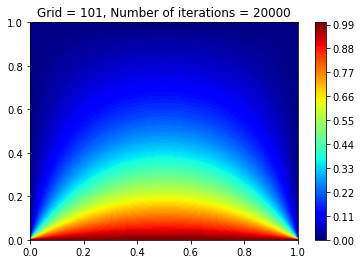

Time taken to solve grid = 101, iterations = 20000: 39.177s


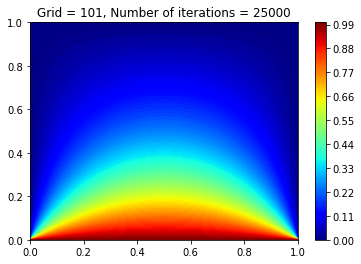

Time taken to solve grid = 101, iterations = 25000: 48.460s


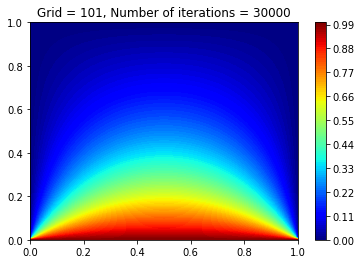

Time taken to solve grid = 101, iterations = 30000: 58.312s


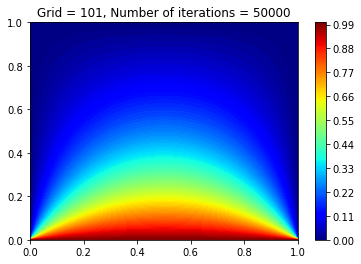

Time taken to solve grid = 101, iterations = 50000: 96.416s


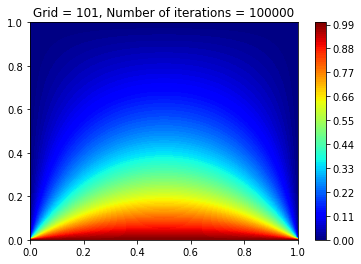

Time taken to solve grid = 101, iterations = 100000: 193.632s
CPU times: user 12min, sys: 2.21 s, total: 12min 2s
Wall time: 12min 2s


In [3]:
%%time
# grid_array = [21,61,101,201]
# maxiter_array = [500,1000,5000,10000,50000]
grid_array = [101]
maxiter_array = [10000,11000,12000,13000,14000,15000,16000,17000,18000,19000,20000,25000,30000,50000,100000]
grids = len(grid_array)
maxiters = len(maxiter_array)

phi_array = np.zeros([grids, maxiters] ,dtype=np.ndarray)
phi_array = cy_fill_array(grids, maxiters, phi_array, grid_array, maxiter_array)

In [47]:
import math
grid_array = [21,101]
power = [1,1.25,1.5,1.75,2,5,10]
grids = len(grid_array)
powers = len(power)

maxiter_array = np.zeros([grids, powers])
for i in range(grids):
    for j in range(powers):
        maxiter_array[i,j] = math.floor(power[j]* (grid_array[i]**2))
maxiter_array

array([[   441.,    551.,    661.,    771.,    882.,   2205.,   4410.],
       [ 10201.,  12751.,  15301.,  17851.,  20402.,  51005., 102010.]])

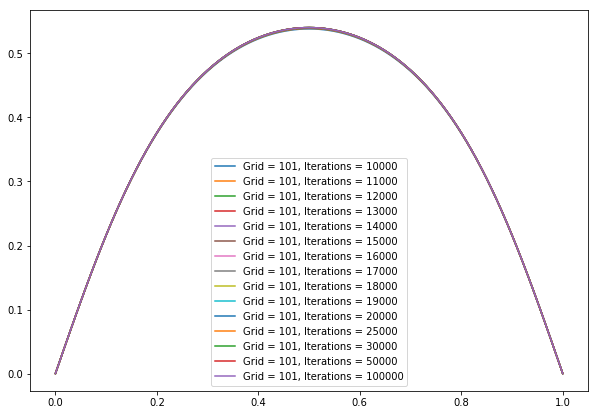

CPU times: user 528 ms, sys: 47 ms, total: 575 ms
Wall time: 360 ms


In [4]:
%%time
cy_plot(grids, phi_array, grid_array, maxiter_array)

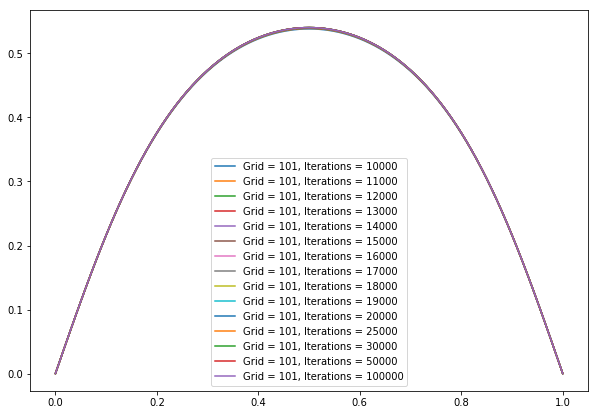

CPU times: user 446 ms, sys: 39.7 ms, total: 486 ms
Wall time: 313 ms


In [5]:
%%time
cy_same_grid_different_iter_plot(grids, phi_array, grid_array, maxiter_array)

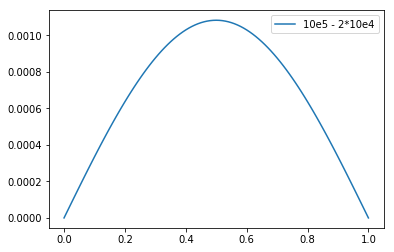

CPU times: user 197 ms, sys: 18.1 ms, total: 215 ms
Wall time: 119 ms


In [6]:
%%time
plt.figure()
# plt.plot(np.linspace(0,1,101), phi_array[0,5] - phi_array[0,0], label = '10e5 - 10e4')
plt.plot(np.linspace(0,1,101), phi_array[0,5] - phi_array[0,1], label = '10e5 - 2*10e4')
# plt.plot(np.linspace(0,1,101), phi_array[0,5] - phi_array[0,2], label = '10e5 - 3*10e4')
# plt.plot(np.linspace(0,1,101), phi_array[0,5] - phi_array[0,3], label = '10e5 - 4*10e4')
# plt.plot(np.linspace(0,1,101), phi_array[0,5] - phi_array[0,4], label = '10e5 - 5*10e4')
plt.legend()
plt.show()

In [7]:
avg_diff = []
for i in range(phi_array.shape[1]-1):
    avg_diff.append(np.sum(np.abs(phi_array[0,phi_array.shape[1]-1]-phi_array[0,i]))/len(maxiter_array))

In [8]:
avg_diff

[0.00874410651083225,
 0.005335907752059954,
 0.0032567381754674994,
 0.001987908226563571,
 0.0012134681880077616,
 0.0007407460083561389,
 0.0004521832483022195,
 0.0002760333991422161,
 0.00016850382289143918,
 0.0001028627997988955,
 6.279240861639252e-05,
 5.322944720655605e-06,
 4.512287941812095e-07,
 2.3131778437157636e-11]

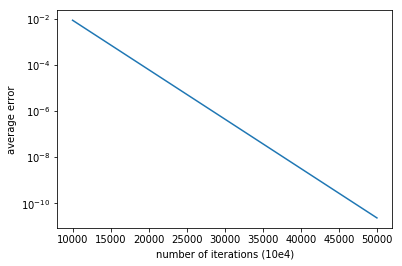

In [23]:
x_axis = [1,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2,2.5,3,5]
plt.figure()
# plt.plot(x_axis[-3:],avg_diff[-3:])
# plt.plot(x_axis,avg_diff)
plt.semilogy(maxiter_array[:-1],avg_diff)
plt.xlabel('number of iterations (10e4)')
plt.ylabel('average error')
plt.show()

In [ ]:
analytical = phi_array[0,5]
analytical